In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e2/sample_submission.csv
/kaggle/input/playground-series-s5e2/train.csv
/kaggle/input/playground-series-s5e2/test.csv


In [12]:
train=pd.read_csv('/kaggle/input/playground-series-s5e2/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s5e2/test.csv')

train=train.drop(['id'],axis=1)
test=test.drop(['id'],axis=1)

In [10]:
train.isnull().sum()

Brand                   9705
Material                8347
Size                    6595
Compartments               0
Laptop Compartment      7444
Waterproof              7050
Style                   7970
Color                   9950
Weight Capacity (kg)     138
Price                      0
dtype: int64

<Axes: xlabel='Brand'>

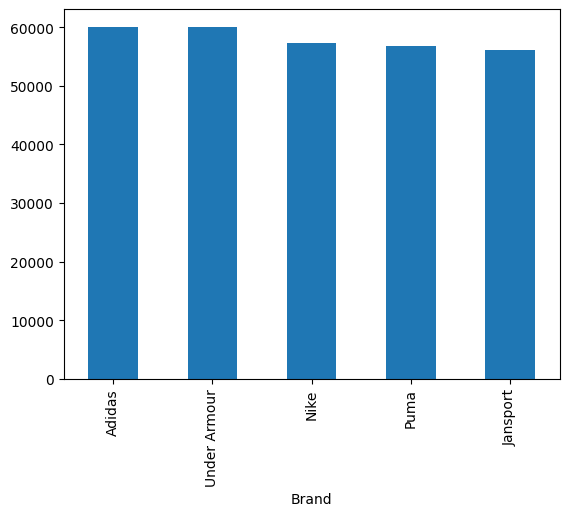

In [14]:
train['Brand'].value_counts().plot(kind='bar')

<Axes: xlabel='Brand'>

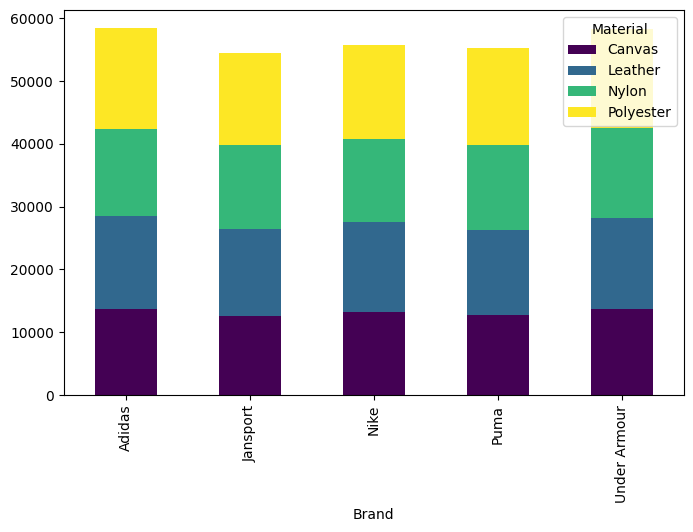

In [19]:
material_counts = pd.crosstab(train["Brand"], train["Material"])

# Plot a stacked bar chart
material_counts.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="viridis")

<Axes: xlabel='Brand'>

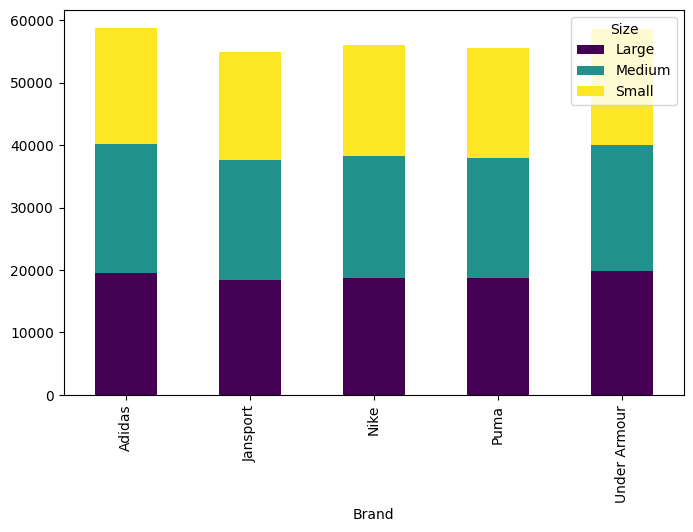

In [20]:
material_counts = pd.crosstab(train["Brand"], train["Size"])

# Plot a stacked bar chart
material_counts.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="viridis")

In [11]:
train.dropna()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312
...,...,...,...,...,...,...,...,...,...,...
299995,Adidas,Leather,Small,9.0,No,No,Tote,Blue,12.730812,129.99749
299996,Jansport,Leather,Large,6.0,No,Yes,Tote,Blue,26.633182,19.85819
299997,Puma,Canvas,Large,9.0,Yes,Yes,Backpack,Pink,11.898250,111.41364
299998,Adidas,Nylon,Small,1.0,No,Yes,Tote,Pink,6.175738,115.89080


In [21]:
train['Brand'].unique()

array(['Jansport', 'Under Armour', 'Nike', 'Adidas', 'Puma', nan],
      dtype=object)

In [22]:
train['Color'].unique()

array(['Black', 'Green', 'Red', 'Blue', 'Gray', 'Pink', nan], dtype=object)

In [23]:
train['Style'].unique()

array(['Tote', 'Messenger', nan, 'Backpack'], dtype=object)

<Axes: ylabel='Frequency'>

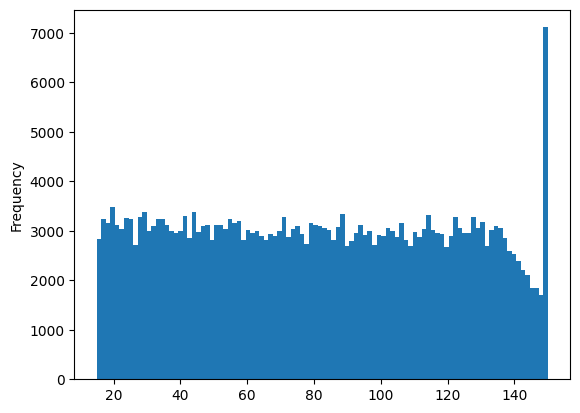

In [32]:
train['Price'].plot.hist(bins=100)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [36]:
X=train.drop(['Price'],axis=1)
y=train['Price']

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [38]:
lr=LinearRegression()